# Airbnb ROI Predictor Model

## Introduction

<p>This aim is to build a model consisting of 2 sub-models.</p>
<p>Upon feeding the model the property features, one will predict the profit of renting the property on Airbnb (The model will predict the yield per day and assume the number of days it will be rented out).</p>
<p>The second model will estimate the price of the property depending on its features.</p>
<p>The result will be based on the results of the 2 sub-models to calculate the ROI for the provided property.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('datasets/airbnb-cleaned-europe-dataset.csv')
df.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Person Capacity'}>,
        <Axes: title={'center': 'Multiple Rooms'}>,
        <Axes: title={'center': 'Business'}>],
       [<Axes: title={'center': 'Cleanliness Rating'}>,
        <Axes: title={'center': 'Guest Satisfaction'}>,
        <Axes: title={'center': 'Bedrooms'}>,
        <Axes: title={'center': 'City Center (km)'}>],
       [<Axes: title={'center': 'Metro Distance (km)'}>,
        <Axes: title={'center': 'Attraction Index'}>,
        <Axes: title={'center': 'Normalised Attraction Index'}>,
        <Axes: title={'center': 'Restraunt Index'}>],
       [<Axes: title={'center': 'Normalised Restraunt Index'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

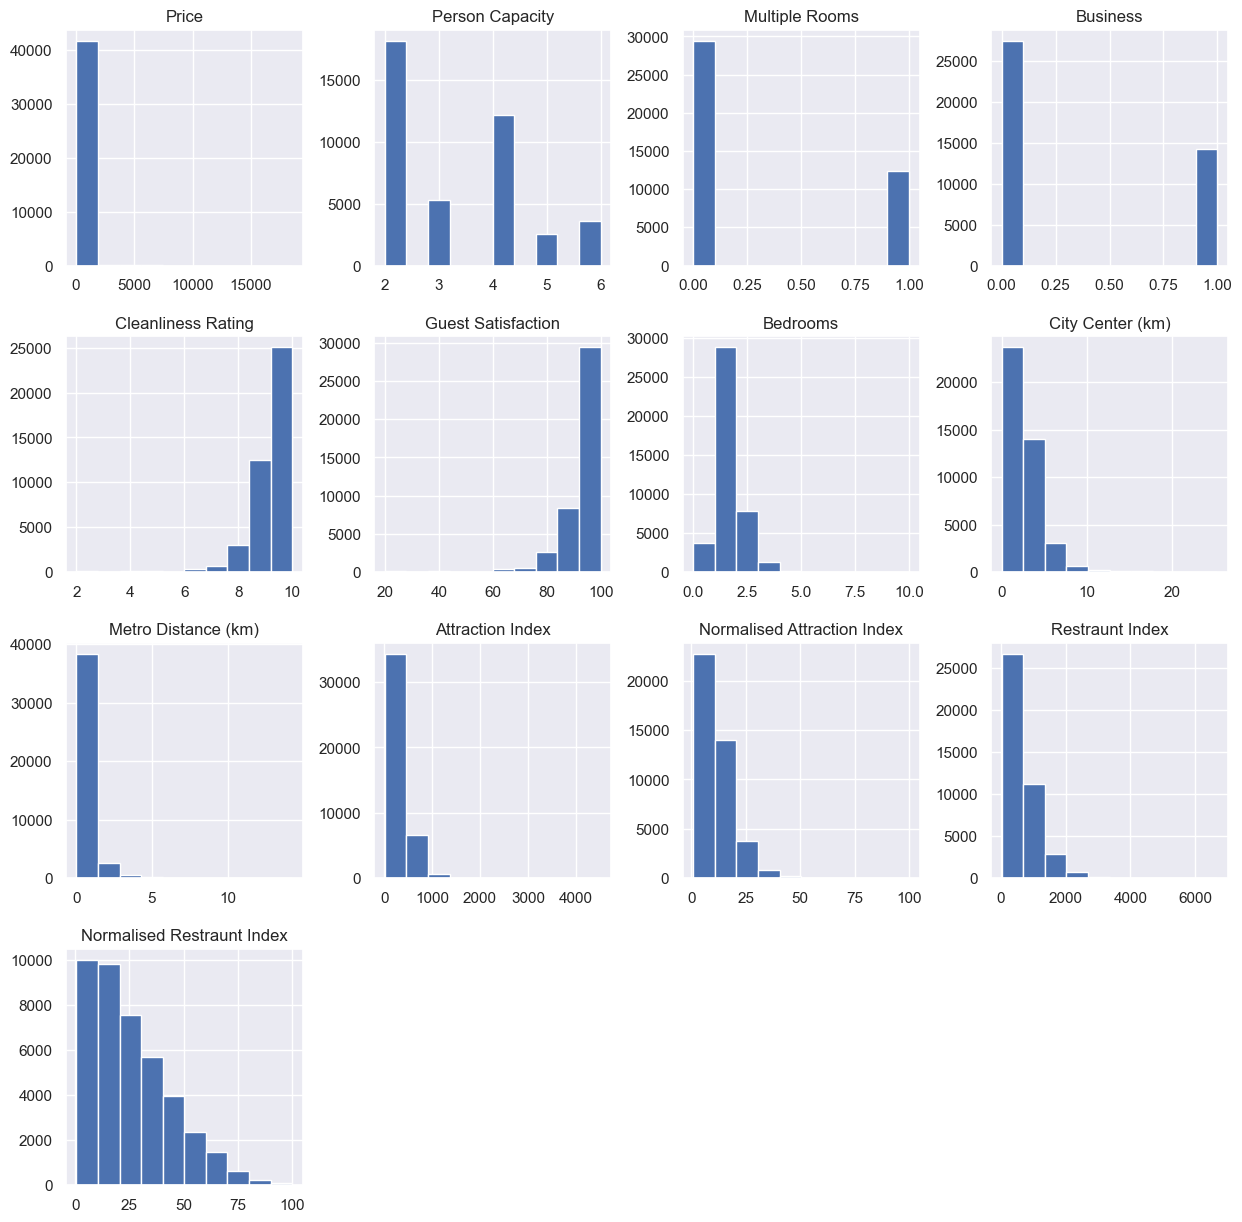

In [40]:
df.hist(figsize=(15,15))

In [41]:
df.corr(numeric_only=True)

,Price,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
Price,1.000000,-0.038231,-0.149694,0.179969,-0.040391,-0.055322,0.014206,0.003987,0.016069,0.206687,-0.052462,-0.038989,0.168785,0.270958,0.113171,0.219385
Shared Room,-0.038231,1.000000,-0.059227,0.042136,-0.032852,-0.018975,0.057259,-0.049365,-0.035134,-0.022719,0.020506,-0.016123,-0.034541,0.000095,-0.033135,0.003528
Private Room,-0.149694,-0.059227,1.000000,-0.475804,-0.056006,0.146854,-0.022433,-0.026518,-0.052664,-0.142468,0.133191,0.032350,0.003532,-0.000511,0.006598,-0.073959
Person Capacity,0.179969,0.042136,-0.475804,1.000000,0.036633,-0.058319,0.099836,0.010089,0.017348,0.559161,-0.077547,0.008423,0.013310,-0.052291,0.021888,-0.010956
Superhost,-0.040391,-0.032852,-0.056006,0.036633,1.000000,0.087061,-0.091925,0.279584,0.292312,0.023717,-0.024647,0.014925,-0.022746,-0.056138,-0.033509,-0.058594
Multiple Rooms,-0.055322,-0.018975,0.146854,-0.058319,0.087061,1.000000,-0.465811,0.033897,0.040208,-0.005096,0.032846,0.035222,0.022380,-0.021696,0.024141,-0.043169
Business,0.014206,0.057259,-0.022433,0.099836,-0.091925,-0.465811,1.000000,-0.076511,-0.178954,-0.022079,-0.181273,-0.066284,0.087144,0.020663,0.113270,0.089935
Cleanliness Rating,0.003987,-0.049365,-0.026518,0.010089,0.279584,0.033897,-0.076511,1.000000,0.691645,0.030951,0.004794,0.019296,-0.024366,-0.041859,-0.031076,-0.047907
Guest Satisfaction,0.016069,-0.035134,-0.052664,0.017348,0.292312,0.040208,-0.178954,0.691645,1.000000,0.042753,0.031176,0.025290,-0.048882,-0.024609,-0.072687,-0.047862
Bedrooms,0.206687,-0.022719,-0.142468,0.559161,0.023717,-0.005096,-0.022079,0.030951,0.042753,1.000000,0.000041,0.053605,-0.015168,-0.082276,-0.016411,-0.076505


<Axes: >

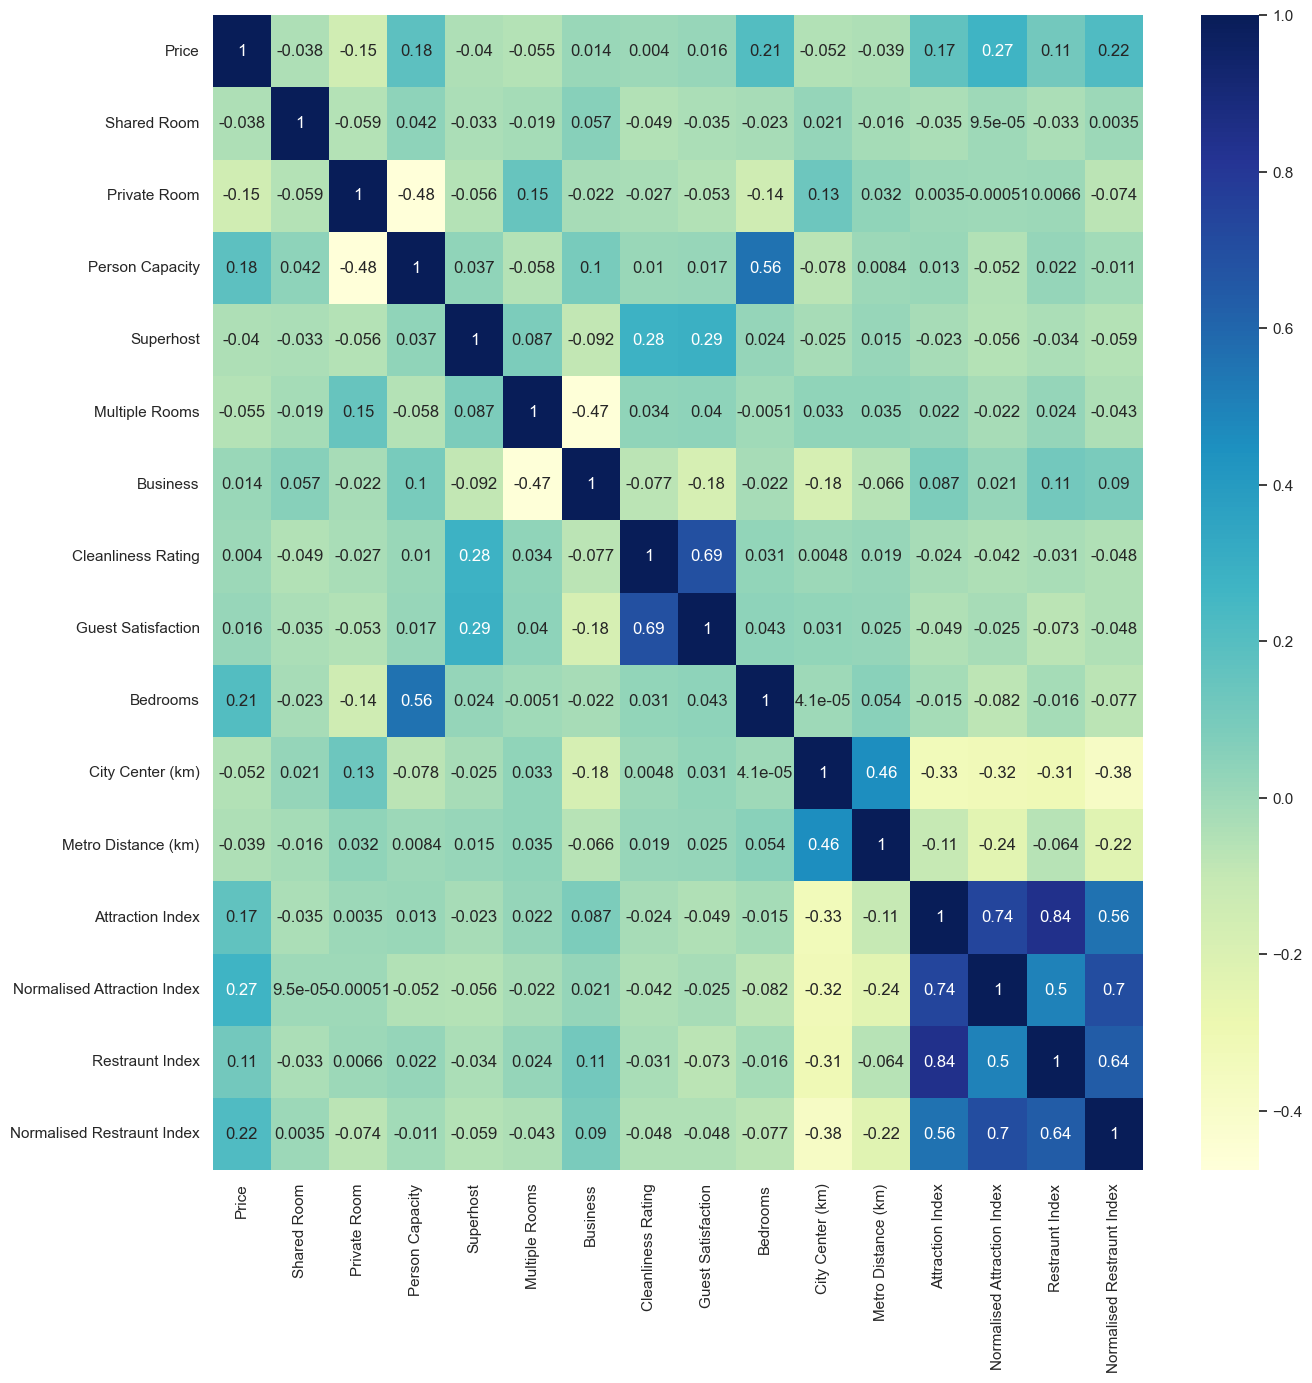

In [42]:
sns.set(rc = {'figure.figsize':(15, 15)})
sns.heatmap(df.corr(numeric_only=True), cmap='YlGnBu', annot=True)